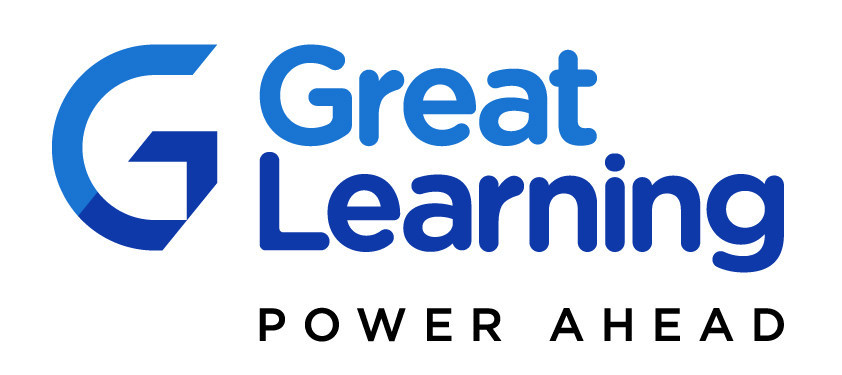

<h1><center><font size=10>Advanced Python - From Analytics to AI</center></font></h1>
<h1><center>Vector Databases - Setting up a Vector Database</center></h1>

## Recap

### Problem Statement

#### Business Context

In the world of online shopping, it's crucial for e-commerce platforms to help customers easily find and buy what they need. But with so many products available, it's a big challenge to make sure the right products are seen by the right people.

E-commerce sites face several key issues:

Lots of Products: There are so many different things to sell that it's hard to organize and categorize them all.
Search Problems: Traditional search tools don't always give the best results, especially if someone spells a word wrong or isn't very specific.
Keeping Customers Happy: It's important to make sure customers have a good experience and can find what they're looking for, so they keep coming back.

### Problem Definition
Big E-Commerce Company X (not x.com, X is an alias here) knows these challenges all too well. They have a huge range of products, from electronics to clothes to home items, and sorting them all out manually takes a lot of time. Plus, if they don't get it right, customers might struggle to find what they want.

As part of the Data Science team at Big E-Commerce Company X, the goal is to find a better way to help people discover products. By using clever techniques like embedding-based similarity search, the plan is to make searching for products easier and more accurate, so customers can find what they want quickly and easily.The perfect way to do this is by having a NLP based spelling correction system as first step and then using embedding similarity search as the second step. since we are limited by time in this session, we are going to step 2 directly.

Apart from product search, product recommendation can also be done using similarity search. We are going to do both search and product recommendation in this session.

The first step for both search and recommendation is converting the text(product description) into embeddings and storing it into a vector database. This process runs quickly with a GPU. After this step, we can implement the search and recommendation using a CPU itself. Hence, we are going to break this MLS into two notebooks. In the first one, we are going to setup the vectorDB using GPU and persist the vectorDB in Gdrive. In the second notebook, we are going to implement the search and recommendation on a CPU.

### Setup

In [ ]:
!pip install -q chromadb==0.4.22 \
                langchain==0.1.9 \
                langchain-community==0.0.32 \
                sentence-transformers==2.3.1

In [ ]:
from scipy.spatial.distance import cosine
import pandas as pd

from google.colab import userdata
from google.colab import drive

from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma


#### Importing the Embedding Model

In [ ]:
embedding_model_name = 'thenlper/gte-large'

In [ ]:
embedding_model = SentenceTransformerEmbeddings(model_name=embedding_model_name)

# Loading the saved vectorDB

In [ ]:
drive.mount('/content/gdrive')

In [ ]:
persisted_vectordb_location = '/content/gdrive/MyDrive/products_db'

In [ ]:
vectorstore_persisted = Chroma(
    collection_name="product_embeddings",
    persist_directory=persisted_vectordb_location,
    embedding_function=embedding_model
)

We can now run the similarity search as before, but the database is hosted and streamed from Google Drive.

Let's run a quick test

In [ ]:
query = "rose scented perfume"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print('\n')

Perfect!

Now let's test our vector search with some customer search behaviour.

# Query

One important and frequent behaviour of consumer behaviour is searching with long natural language sentences instead of consice keywords like in product names. There used to be an early internet search engine called Ask Jeeves — which promised results from just such a query. Think “what sleeping bag is best for camping in below-freezing temps?” vs. “cold-weather sleeping bag.”

We will try to see if we can do the same with vectorDBs.

People also use slang instead of the formal name like - 'kicks vs shoes'. Consumer search products to fulfill their desires which reflects in their search patterns. Instead of searching for 'colourblocked premium Nike shoes" they will search for "kickass kicks".

Let's try few example searches for our product range.

In [ ]:
query = "I have bad odour, what should i do"

Instead of asking for a perfume, we are typing the problem. Even though bad odour is not in the description, relevant products are retrieved.

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

In [ ]:
query = "My skin has gone dry provide shampoo"

Once again, we are searching a problem instead of a product. We would expect the ideal system to retrieve moisturising products like lotions and oils.

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

In [ ]:
query = "I have bad odour, what should i do"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

In [ ]:
query = "diabetes control product at cheap price with high discount"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Most of our product descriptions do not explicitly mention the word diabetes yet relevant products are searched effectively.

Let's try a very generic open ended query and see what kind of products are recommended.

In [ ]:
query = "impress girls"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

In [ ]:
query = "high discount fruits"

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Using the same embedding similarity, we can also find relevant products that we can recommend to the customer.

### Product Recommendations

For every product page a customer visits, we can recommend products that are similar to the current product. This can be one of the many inputs for a recommendation engine.

In [ ]:
query = "Flaxseeds are considered one of the most powerful plant foods on the planet. Rich in heart loving omega 3 essential fatty acids, lignans and both soluble and insoluble fibre, flaxseed bestows health benefits like no other."

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

The most similar one to the text above will be the same product and hence it will come up at the top. A business would put up code to remove it from the list and recommend the other products.

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

In [ ]:
query = "Cloves are the aromatic flower buds of a tree in the family Myrtaceae, scientifically termed as Syzygium aromaticum. It is commercially harvested in India, Madagascar, Zanzibar, Sri Lanka, and Tanzania. It is an important ingredient as a spice, which blends all across the North Indian cuisine, and is known as “Laung” in Hindi.  Cloves are an excellent source of manganese, a very good source of vitamin K and dietary fiber, and a good source of iron, magnesium, and calcium."

Let's assume the consumer is looking for cloves. It is common sense that the consumer will also want to buy other spices. Let's see if we get other spices or other cooking ingreedients as suggestions.

In [ ]:
docs = vectorstore_persisted.similarity_search(query, k=5)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

Alas! most of the products are cloves itself. We would want to suggest a mix of 'different' cloves and other related products. Let's try using the similarity score to get a good list of recommended products.

In [ ]:
query = "Cloves are the aromatic flower buds of a tree in the family Myrtaceae, scientifically termed as Syzygium aromaticum. It is commercially harvested in India, Madagascar, Zanzibar, Sri Lanka, and Tanzania. It is an important ingredient as a spice, which blends all across the North Indian cuisine, and is known as “Laung” in Hindi.  Cloves are an excellent source of manganese, a very good source of vitamin K and dietary fiber, and a good source of iron, magnesium, and calcium."

Let's first retrieve a handful of documents (say, 100) which we can then filter to get a good selection of

In [ ]:
doc_r = vectorstore_persisted.similarity_search_with_relevance_scores(query, k=100)

similarity_search_with_relevance_scores return a tuple of (docs, r). So, let's rewrite out printing logic to accomodate this.

In [ ]:
count = 0
for i, (doc,r) in enumerate(doc_r):
  if count < 5 and r < 0.80 and r >0.78: # r is inversely proportional to cosine_distance so higher score means higher similarity.
    # We are only selecting products between similarity scores of 0.8 and 0.78. This way products that are related but not the same product might surface.
    # The numbers are chosen pragmatically and there is no formula to come up with them
    count += 1 #To get only 5 results
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

We got what we wanted. We were able to fetch products that are related to the product but is not the exact same product.

We can also try the max_marginal_relevance_search function to get diverse results. Let's see how it performs.

In [ ]:
docs = vectorstore_persisted.max_marginal_relevance_search(query,k=5, score_threshold = 0.1)

In [ ]:
for i, doc in enumerate(docs):
    print(f"Retrieved chunk {i+1}: \n")
    print(doc.page_content.replace('\t', ' '))
    print(doc.metadata)
    print('\n')

It doesn't seem to work as well as our hack with similarity score. A mix of different variations of the same product, related products can be recommended  by combining results from these different queries. We can further add other product recommendation techniques like collaborative filtering and content filtering to selected a handful of products for the customer however that is outside the scope of this session. For items like cloves, collaborative filtering would readily give the right recommendations however, with low frequency items or during cold start or with niche items, similarity scores based recommendation coould be quite handy.

**Power Ahead!**